In [39]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [40]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


###### Описание данных:        
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000 USD
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

В задании по теме "Работа с переменными" мы уже анализировали датасет "Boston house prices" (https://github.com/peter25225/machine_learning_21/blob/master/07_Variables/06_Variables_HW.ipynb).

Чтобы не повторять весь анализ (матрица корреляций, выбросы и т.п.), приведу основные выводы в части данных:

#### 1. Можно выделить две группы параметров:

1) Относительно независимые друг от друга параметры (нет корреляций более 0.7):
CRIM, ZN, CHAS, RM, PTRATIO, B, LSTAT

2) Тесно связанные друг с другом параметры (есть корреляции более 0.7):
INDUS, NOX, AGE, DIS, RAD, TAX

В целом первая группа параметров должна стать основой для моделирования, а из второй группы необходимо выбрать только некоторые параметры, которые будут добавлять максимум полезной информации

#### 2. Существуют значения целевой переменной MEDV = 50, которые можно удалить (кажется, это некорректные данные)

В этой связи оставим только данные с MEDV < 50


In [42]:
data = data[data.MEDV < 50]

#### 3. Значения параметра INDUS сосредоточены в двух диапазонах: 5-10 и 15-25. 

Это может означать, что в данных есть две принципиально разные группы объектов (например, центр города и окраина). Для достижения большей точности может иметь смысл разделить данные на две группы и строить отдельную модель для каждой. Проверим это позже.

#### 4. Первоначально возьмем набор полный набор параметров:

'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'


In [43]:
X = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = data['MEDV']

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
regressor = DecisionTreeRegressor()
DT_reg=regressor.fit(X_train, Y_train)

Оценим качество модели с помощью параметра score

In [46]:
print("Тренировочные данные")
print(DT_reg.score(X_train,Y_train))
print("Тестовые данные")
print(DT_reg.score(X_test,Y_test))

Тренировочные данные
1.0
Тестовые данные
0.7157656055558239


Заметно, что при использовании параметров по умолчанию (в частности без ограничений на глубину дерева, максимальное число листьев) модель переобучилась на тренировочных данных (score=1) и дала не очень высокий результат на тестовых данных.

Путем подбора гиперпараметров (max_depth, min_samples_leaf, max_leaf_nodes) удалось существенно улучшить этот результат.

In [47]:
regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, max_leaf_nodes=15)
DT_reg=regressor.fit(X_train, Y_train)

In [48]:
print("Данные для обучения")
print(DT_reg.score(X_train,Y_train))
print("Данные для теста")
print(DT_reg.score(X_test,Y_test))

Данные для обучения
0.8786698693575963
Данные для теста
0.8146423984276678


Его хорошо было бы проверить на валидационных данных, но датасет и так небольшой, решил, что это не принципиально в данном случае.

Следующим шагом попробуем подобрать параметры, исключим те из них, которые коррелируют с другими. В итоге оптимальным кажется следующий набор:

In [49]:
X = data[['CRIM','INDUS','NOX','RM','PTRATIO','LSTAT']]
y = data['MEDV']

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, max_leaf_nodes=15)
DT_reg=regressor.fit(X_train, Y_train)

In [52]:
print("Данные для обучения")
print(DT_reg.score(X_train,Y_train))
print("Данные для теста")
print(DT_reg.score(X_test,Y_test))

Данные для обучения
0.8783193878535949
Данные для теста
0.8171431111254515


Оценим и визуализируем уровень важности признаков модели:

In [53]:
regressor.feature_importances_

array([0.02519226, 0.00566704, 0.02383803, 0.26978068, 0.0075633 ,
       0.66795869])

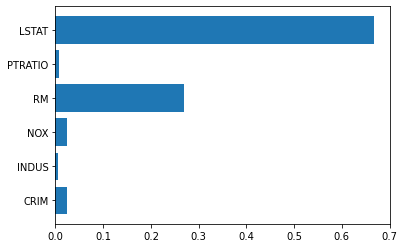

In [54]:
plt.barh(np.arange(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)
plt.show()

Далее вернемся к идее разделения датасета на две части относительно значения параметра INDUS

In [55]:
low_indus = data[data['INDUS'] <= 15]

high_indus = data[data['INDUS'] > 15]

Построим модель для первой части данных

In [56]:
X = low_indus[['CRIM','INDUS','NOX','RM','PTRATIO','LSTAT']]
y = low_indus['MEDV']

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
regressor = DecisionTreeRegressor(max_depth=4)
DT_reg=regressor.fit(X_train, Y_train)

In [59]:
print("Данные для обучения")
print(DT_reg.score(X_train,Y_train))
print("Данные для теста")
print(DT_reg.score(X_test,Y_test))

Данные для обучения
0.8909284351494993
Данные для теста
0.8374601208423241


А также для второй части данных

In [61]:
X = high_indus[['CRIM','INDUS','NOX','RM','PTRATIO','LSTAT']]
y = high_indus['MEDV']

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, Y_train)

In [64]:
print("Данные для обучения")
print(DT_reg.score(X_train,Y_train))
print("Данные для теста")
print(DT_reg.score(X_test,Y_test))

Данные для обучения
0.9278389338947018
Данные для теста
0.8523328781102856


Очевидно, такой подход улучшает результат (хотя и накладывает некоторые ограничения при работе с моделью в дальнейшем).

Визуализируем дерево решений

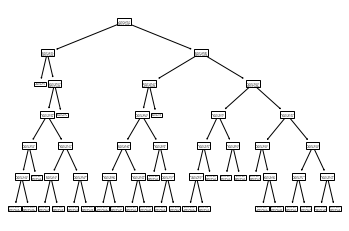

In [65]:
tree.plot_tree(regressor)
plt.show()

In [34]:
# К сожалению пакеты dtreeviz и graphviz у меня не срабатывают...